# Introduction to Bioimage Analysis

---
## Learning Objectives
By the end of this module, learners will be able to:
- Understand what bioimage analysis is and where it is applied.
- Describe common goals of image analysis in microscopy and pathology.
- Explain core concepts such as segmentation, object detection, and tracking.
- Perform basic image analysis using Python and open-source tools.
- Apply theory to a real-world case study: segmenting nuclei in microscopy images.

---
### What is Bioimage Analysis?
Bioimage analysis is the computational process of extracting meaningful information from biological images, often acquired using microscopes or imaging devices. These images can range from simple brightfield stains to complex 3D fluorescence datasets.

**Applications include:**
- Microscopy (cell biology, developmental biology)
- Pathology (digital histology)
- Neuroscience (tracing neurons)
- Pharmacology (screening assays)
- Cancer research (tumor segmentation)

### Hands-On Example
Load and view a microscopy image using Python.

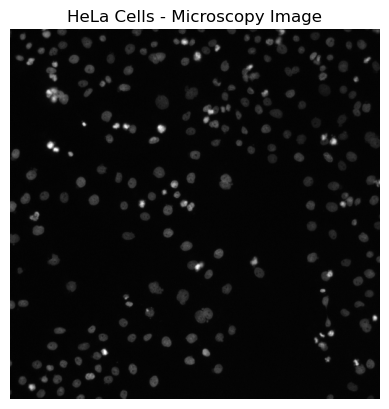

In [1]:
from skimage import io
import matplotlib.pyplot as plt

image = io.imread('data/nuclei.tif')
plt.imshow(image, cmap='gray')
plt.title("HeLa Cells - Microscopy Image")
plt.axis('off')
plt.show()

### Exercise
1. Open a sample .tif file and inspect the image.
2. Change the color map (cmap) and observe effects.

---
## Where is Bioimage Analysis Used?

| Domain                        | Use Case                                | Example Tools  |
| ----------------------------- | --------------------------------------- | -------------- |
| **Microscopy**                | Identifying cell compartments, dynamics | ImageJ, Napari |
| **Histopathology**            | Tumor detection, grading                | QuPath, AIDA   |
| **Neuroscience**              | Neuron tracing                          | Vaa3D          |
| **High-Throughput Screening** | Analyzing drug responses                | CellProfiler   |

### Hands-On Example
Explore a pathology image and learn about its color channels.

In [2]:
from skimage import color

rgb_image = io.imread('data/nuclei.tif')  # Substitute with an H&E image if available
gray_image = color.rgb2gray(rgb_image)

plt.subplot(1, 2, 1)
plt.imshow(rgb_image)
plt.title("Original RGB")

plt.subplot(1, 2, 2)
plt.imshow(gray_image, cmap='gray')
plt.title("Grayscale")

plt.show()


ValueError: the input array must have size 3 along `channel_axis`, got (512, 512)

### Exercise
1. Compare RGB and grayscale representations.
2. Identify visible tissue structures.

---
## Image Analysis Goals
Some common goals in bioimage analysis include:
- **Counting:** Number of cells, nuclei, organelles.
- **Segmentation:** Outlining objects of interest.
- **Tracking:** Following moving cells over time.
- **Classification:** Labeling cell types or conditions.
- **Quantification:** Measuring area, intensity, shape.

| Goal           | Description                   | Example Output         |
| -------------- | ----------------------------- | ---------------------- |
| Counting       | Identify object centroids     | Cell count per field   |
| Segmentation   | Create masks/boundaries       | Segmented binary image |
| Tracking       | Match cells across timepoints | Movement paths         |
| Classification | Use features to label types   | Normal vs. Cancerous   |


### Hands-On Example
Simple thresholding to count nuclei.

Detected objects: 259


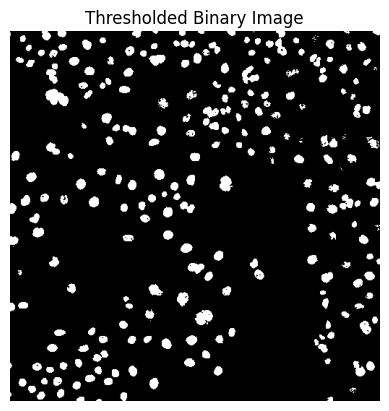

In [3]:
from skimage.filters import threshold_otsu
from skimage.measure import label, regionprops

gray = io.imread('data/nuclei.tif')
thresh = threshold_otsu(gray)
binary = gray > thresh

labeled = label(binary)
regions = regionprops(labeled)

print(f"Detected objects: {len(regions)}")

plt.imshow(binary, cmap='gray')
plt.title("Thresholded Binary Image")
plt.axis('off')
plt.show()


### Exercise
1. Try using different thresholding values (e.g., manual, Otsu).
2. Count and list region properties: area, eccentricity.



## Case Study: Segmenting Nuclei in Microscopy Images
Nuclei segmentation is a foundational task in cell biology. Accurate segmentation allows for:
- Measuring cell proliferation
- Analyzing nuclear morphology
- Detecting abnormalities

**Pipeline:**
- Load image
- Preprocess (filter, threshold)
- Segment (binary mask)
- Post-process (remove small objects)
- Analyze (count, measure shape)

**Hands-On Workflow:**

Segment nuclei and visualize regions.

In [ ]:
from skimage.morphology import remove_small_objects
import numpy as np

# Preprocessing
binary_clean = remove_small_objects(binary, min_size=100)

# Overlay
plt.imshow(gray, cmap='gray')
plt.contour(binary_clean, colors='r')
plt.title("Nuclei Segmentation Overlay")
plt.axis('off')
plt.show()

### Exercise
1. Vary min_size and observe changes.
2. Export properties of each nucleus to a CSV file.

---
## Mini Project
**Project Title:** Quantify Nuclei in a New Dataset

**Objective:** Apply what you've learned to segment and count nuclei from a microscopy image of your choice.

**Steps:**
1. Load your image (use your own or a provided .tif)
2. Convert to grayscale (if needed)
3. Threshold and segment the nuclei
4. Remove small artifacts
5. Count and measure nuclei properties (area, eccentricity, mean intensity)
6. Save results to a CSV file
7. Visualize final segmentation overlay

**Deliverables:**
- Code notebook
- CSV file with measurements
- Visualization figure with segmentation overlay

---
## Module Summary
| Section                    | Concept                         | Tool/Method                              | Output                      |
| -------------------------- | ------------------------------- | ---------------------------------------- | --------------------------- |
| What is Bioimage Analysis? | Image as data                   | `skimage.io`, `matplotlib`               | Visualized image            |
| Applications               | Domains (microscopy, pathology) | `color.rgb2gray`, RGB views              | Color channel comparison    |
| Goals                      | Count, segment, track           | `threshold_otsu`, `label`                | Binary masks, object counts |
| Case Study                 | Nuclei segmentation             | Filtering, thresholding, post-processing | Segmentation overlay        |
| Project                    | Real dataset analysis           | All of above                             | Full analysis pipeline      |
